<a href="https://colab.research.google.com/github/KunChen-tw/DeepLearning/blob/main/Practice_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice 6-2

For the 2D spatial projection above, show the top-5 words that are close to word ‘AI’.



In [1]:
 # Packages for numerical operations and plotting
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Load the machine learning package
from sklearn.decomposition import PCA

#Load the Word2vec package
from gensim.models import Word2Vec

import jieba
import re

In [3]:
f = open("./topmachinelearningpaper.txt", 'r',encoding="utf-8")
lines = []
for line in f:
    temp = jieba.lcut(line)
    words = []
    for i in temp:
        #Filter out all punctuation
        i = re.sub("[\s+\.\!\/_,$%^*(+\"\'””《》]+|[+——！，。？、~@#￥%……&*（）：；‘]+", "", i)
        if len(i) > 0:
            words.append(i)
    if len(words) > 0:
        lines.append(words)
print(lines[0:2])


Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.941 seconds.
DEBUG:jieba:Loading model cost 0.941 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


[['Top', 'Machine', 'Learning', 'Papers', 'to', 'Read', 'in', '2023'], ['Machine', 'Learning', 'is', 'a', 'big', 'field', 'with', 'new', 'research', 'coming', 'out', 'frequently', 'It', 'is', 'a', 'hot', 'field', 'where', 'academia', 'and', 'industry', 'keep', 'experimenting', 'with', 'new', 'things', 'to', 'improve', 'our', 'daily', 'lives']]


In [15]:
# Call Word2vec's algorithm for training.
# The parameters are: vector_size: the embedded word vector dimension, window: the width of the context,
# min_count: the lowest word frequency threshold for the word to be calculated.
model = Word2Vec(lines, vector_size= 20, window = 2 , min_count = 1)


print(model.wv.most_similar('AI', topn = 20))


[('Transformer', 0.5496135950088501), ('detection', 0.512261152267456), ('new', 0.4894311726093292), ('txt', 0.48295965790748596), ('3', 0.479834645986557), ('coming', 0.45238155126571655), ('neural', 0.4346129596233368), ('in', 0.4328274130821228), ('2D', 0.4309350550174713), ('releasing', 0.4299663305282593), ('asked', 0.42341309785842896), ('or', 0.4128345847129822), ('an', 0.39785516262054443), ('Baselines', 0.3807675838470459), ('aim', 0.3725624978542328), ('want', 0.37162867188453674), ('Open', 0.36863407492637634), ('network', 0.3614785671234131), ('companies', 0.35713106393814087), ('rules', 0.354131817817688)]


rawWordVec.shape (499, 20)
X_reduced.shape (499, 2)


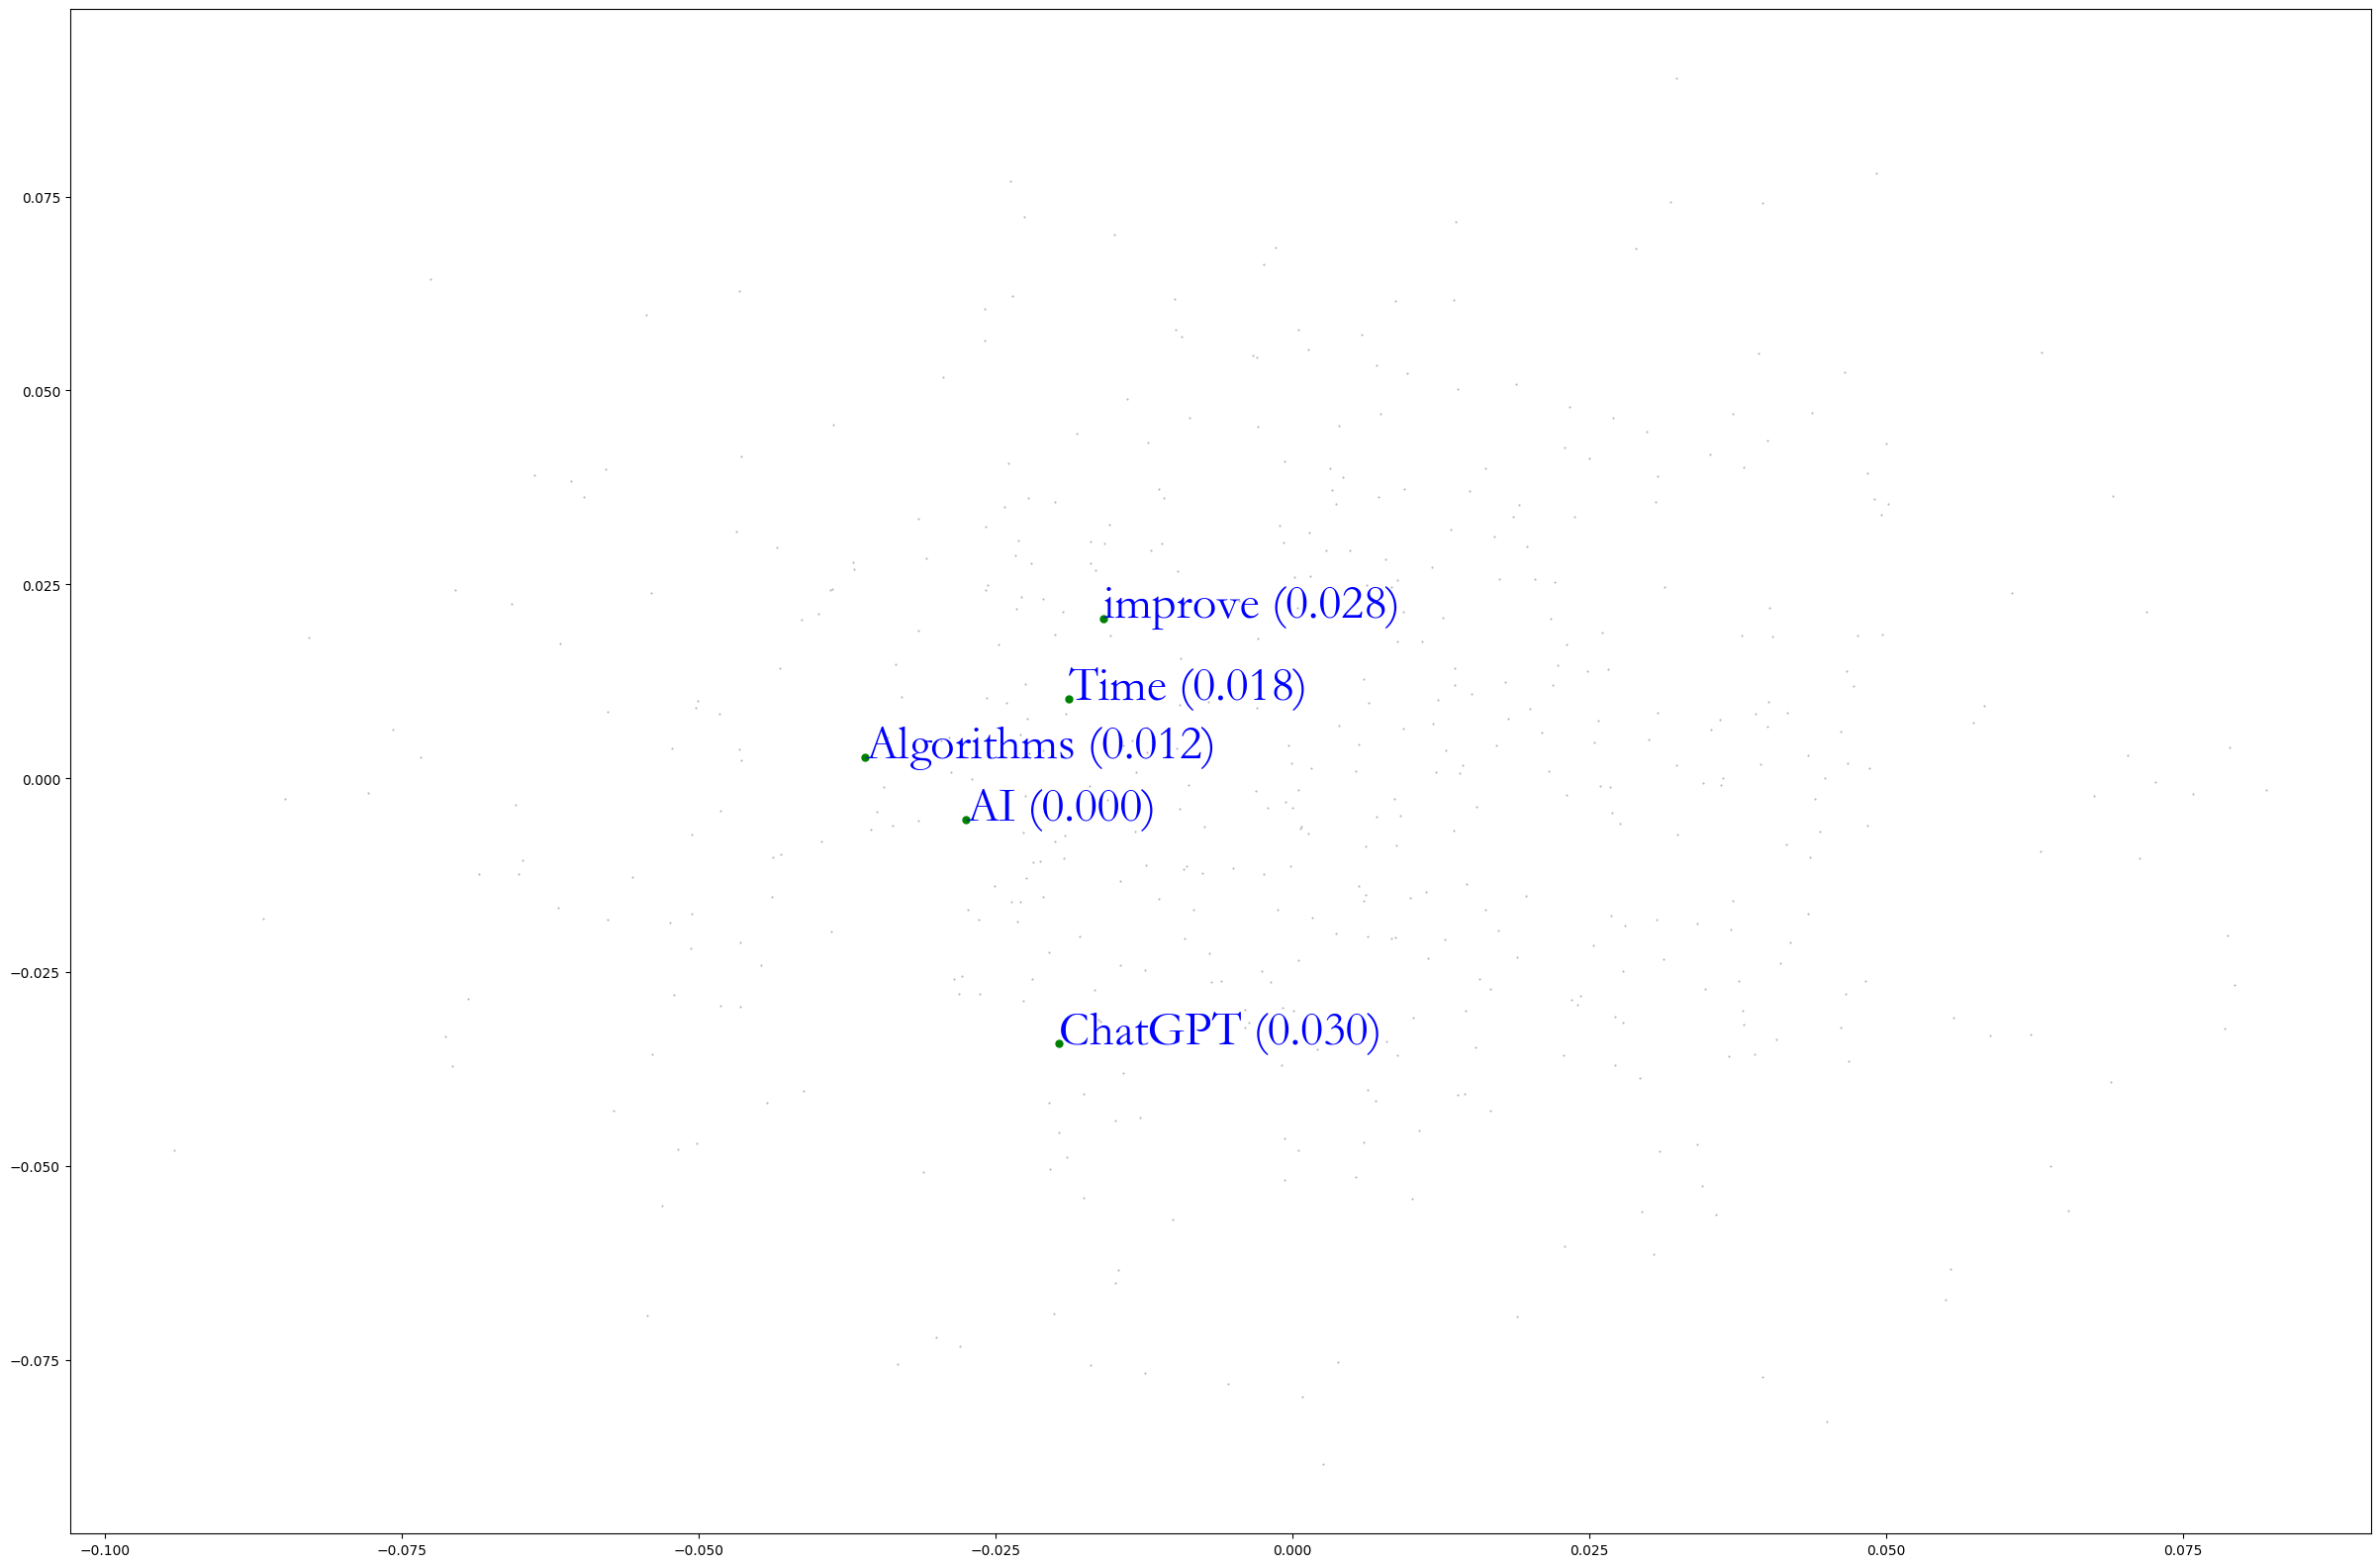

In [19]:
# Project word vectors into two-dimensional space
rawWordVec = []
word2ind = {}
for i, w in enumerate(model.wv.index_to_key):
    rawWordVec.append(model.wv[w])
    word2ind[w] = i
rawWordVec = np.array(rawWordVec)
print('rawWordVec.shape',rawWordVec.shape)
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)
print('X_reduced.shape',X_reduced.shape)

# Draw a two-dimensional spatial projection of all word vectors
fig = plt.figure(figsize = (30, 20))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 1, alpha = 0.3, color = 'black')

# Draw a vector of several special words
words = ['machine', 'learning', 'Algorithms', 'papers', 'AI', 'ChatGPT', 'language', 'analysis', 'Time', 'Models', 'Voice', 'improve', 'deep']
# Set the Chinese font, otherwise the Chinese cannot be displayed on the graph
zhfont1 = matplotlib.font_manager.FontProperties(fname='./chinese_song.ttf', size=35)

xyAI = X_reduced[word2ind['AI']]

# 用來儲存字串與 'AI' 之間的距離
distances = []

# 計算每個字串到 'AI' 的距離
for w in words:
    if w in word2ind:
        ind = word2ind[w]
        xy = X_reduced[ind]
        # 計算歐氏距離
        distance = np.linalg.norm(xy - xyAI)
        distances.append((w, xy, distance))

# 根據距離排序，並取出最接近的前五名
closest_words = sorted(distances, key=lambda x: x[2])[:5]

# 繪製最接近的前五個字串的座標點和文字標籤
for word, xy, dist in closest_words:
    plt.plot(xy[0], xy[1], '.', alpha=1, color='green', markersize=10)
    # 顯示字串名稱和距離
    plt.text(xy[0], xy[1], f"{word} ({dist:.3f})", fontproperties=zhfont1, alpha=1, color='blue')


